In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [5]:
wine_dataset = pd.read_csv(r"C:\Users\USER\Documents\Machine Learning Project\winequality-red.csv")

In [6]:
wine_dataset.shape

(1599, 12)

In [7]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Data Analysis and Visualization

In [11]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
correlation = wine_dataset.corr()

In [38]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

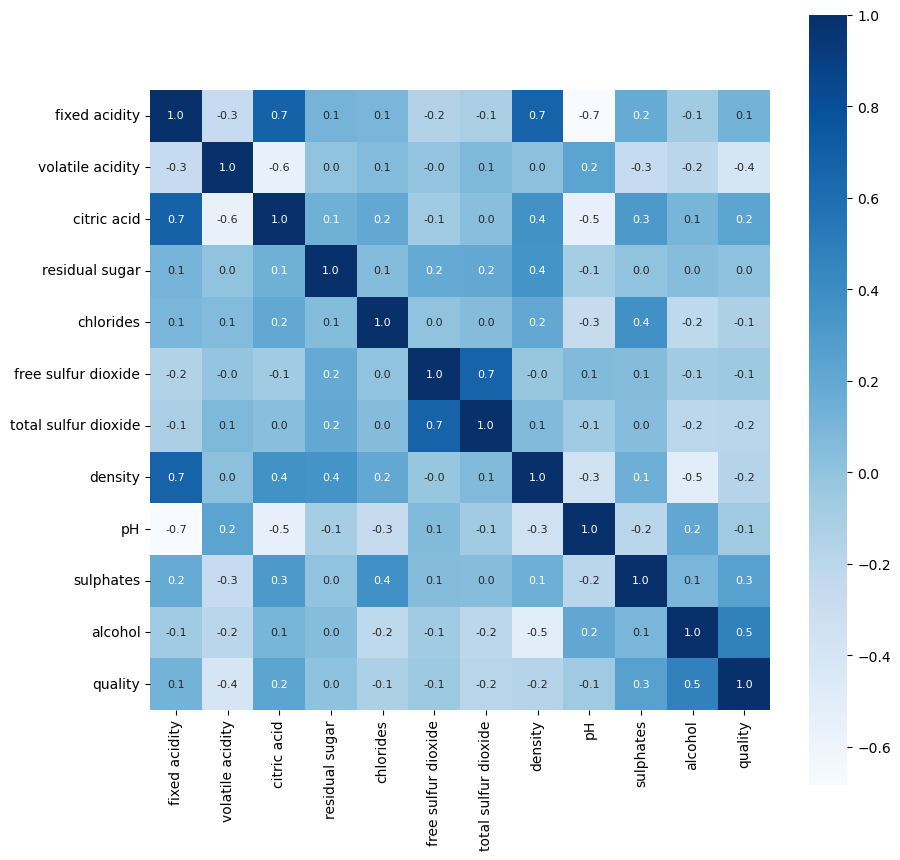

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
wine_dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


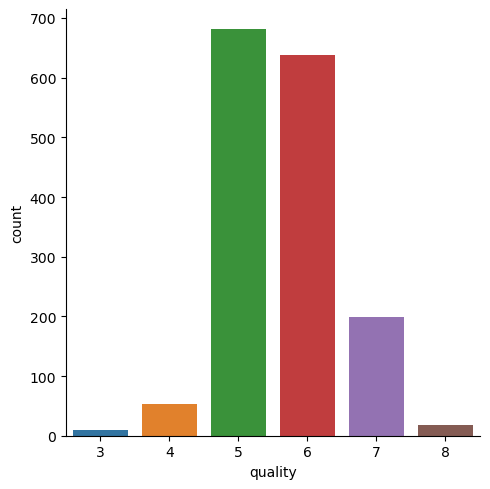

In [15]:
sns.catplot(x='quality', data= wine_dataset, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

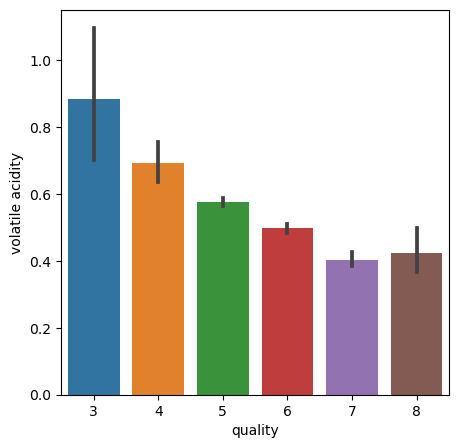

In [24]:
plot= plt. figure(figsize=(5,5))
sns.barplot(x='quality', y= 'volatile acidity', data= wine_dataset) #The volatile acidity is inversely proportional to quality

<Axes: xlabel='quality', ylabel='citric acid'>

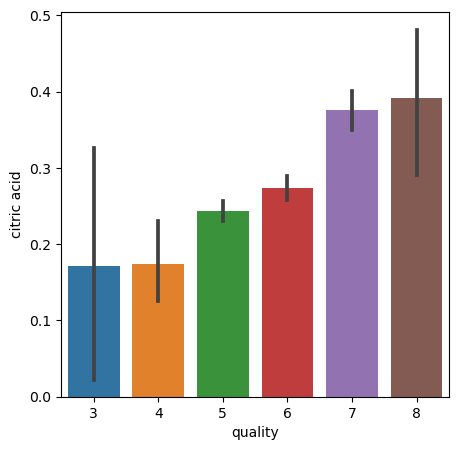

In [25]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'citric acid', data= wine_dataset) #citric acid is directly proportional to quality

<Axes: xlabel='quality', ylabel='residual sugar'>

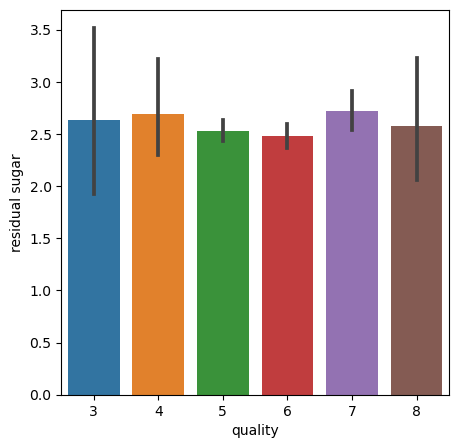

In [27]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'residual sugar', data= wine_dataset) # the value of residual sugar do not really have any effect  

<Axes: xlabel='quality', ylabel='chlorides'>

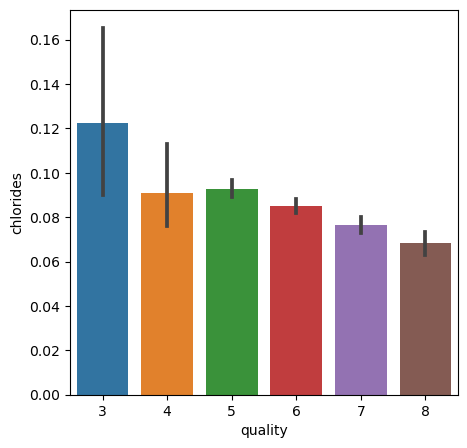

In [30]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'chlorides', data= wine_dataset) #The chloride level is directly proportional to the quality

<Axes: xlabel='quality', ylabel='density'>

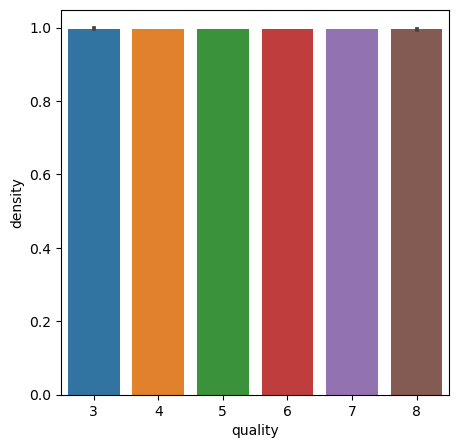

In [31]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'density', data= wine_dataset) #The density does not have effect on the quality

<Axes: xlabel='quality', ylabel='pH'>

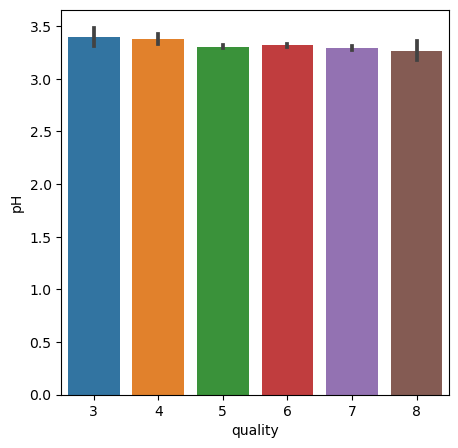

In [33]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'pH', data= wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

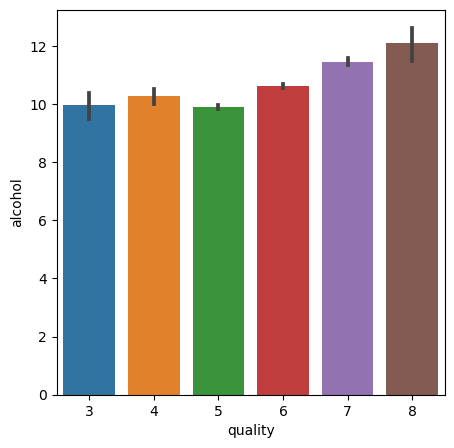

In [35]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'alcohol', data= wine_dataset)

### Data Preprocessing

In [41]:
X = wine_dataset.drop(columns= 'quality', axis= 1)

In [42]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [44]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [45]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train and test split

In [46]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [48]:
X_train.shape, Y_train.shape, X_test.shape

((1279, 11), (1279,), (320, 11))

#### Model Training

In [49]:
model = RandomForestClassifier() 

In [50]:
model.fit(X_train, Y_train)

RandomForestClassifier()

#### Model Evaluation

In [52]:
X_train_predict= model.predict(X_train)
X_train_accuracy= accuracy_score(X_train_predict,Y_train)
print(f'The accuracy score for training data is {X_train_accuracy}')

The accuracy score for training data is 1.0


In [55]:
X_test_predict= model.predict(X_test)
X_test_accuracy= accuracy_score(X_test_predict, Y_test)
print(f'The accuracy score for testing data is {X_test_accuracy}')

The accuracy score for testing data is 0.915625


#### Building a predictive system

In [59]:
input_data = (7.1,0.71,0,1.9,0.08,14,35,0.9972,3.47,0.55,9.4)
input_data_as_array= np.asarray(input_data)
input_data_reshape= input_data_as_array.reshape(1,-1) 
prediction= model.predict(input_data_reshape)
print(prediction)

[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
if prediction ==1:
    print('It is a good quality wine')
else:
    print('It is a bad quality wine')

It is a bad quality wine
